<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#aim-and-objective" data-toc-modified-id="aim-and-objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>aim and objective</a></span></li><li><span><a href="#env-set-up,-data-exploration" data-toc-modified-id="env-set-up,-data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>env set-up, data exploration</a></span></li><li><span><a href="#animated-plot-demo" data-toc-modified-id="animated-plot-demo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>animated plot demo</a></span></li></ul></div>

# aim and objective
scan result animated surface plot scan to show individual factors effects  
scan result only contains resultant carbon density $>$0.1 gCm$^{-3}$ in every carbon pools considered (i.e. org-C, org-P, org-B)
# env set-up, data exploration

In [1]:
using DataFrames, CSV, RCall, Plots
@rimport graphics

In [2]:
rAw = CSV.read("../result/maxYield_0.1.csv")

,x,e_PR,e_P,g_P,a_P,e_BR,e_B,g_B,m_B
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.1,0.1,0.1,0.001,0.1,0.1,0.1,0.001
2,0.0,0.1,0.1,0.1,0.001,0.1,0.1,0.6,0.001
3,0.0,0.1,0.1,0.1,0.001,0.1,0.6,0.1,0.001
4,0.0,0.1,0.1,0.1,0.001,0.6,0.1,0.1,0.001
5,0.0,0.1,0.1,0.6,0.001,0.1,0.1,0.1,0.001
6,0.0,0.1,0.1,0.6,0.001,0.1,0.1,0.6,0.001
7,0.0,0.1,0.1,0.6,0.001,0.1,0.6,0.1,0.001
8,0.0,0.1,0.1,0.6,0.001,0.1,0.6,0.1,0.101
9,0.0,0.1,0.1,0.6,0.001,0.1,0.6,0.1,0.201


In [3]:
Dict(
    "x" => unique(rAw[:,1]),
    "ePR" => unique(rAw[:,2]),
    "eP" => unique(rAw[:,3]),
    "gP" => unique(rAw[:,4]),
    "aP" => unique(rAw[:,5]),
    "eBR" => unique(rAw[:,6]),
    "eB" => unique(rAw[:,7]),
    "gB" => unique(rAw[:,8]),
    "mB" => unique(rAw[:,9])
)

Dict{String,Array{Float64,1}} with 9 entries:
  "mB"  => [0.001, 0.101, 0.201, 0.301, 0.401, 0.501, 0.601, 0.701, 0.801, 0.90…
  "ePR" => [0.1, 0.6]
  "eP"  => [0.1, 0.6]
  "gP"  => [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.…
  "x"   => [0.0, 0.5, 1.0]
  "eB"  => [0.1, 0.6]
  "gB"  => [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.…
  "aP"  => [0.001, 0.101, 0.201, 0.301, 0.401, 0.501, 0.601, 0.701, 0.801, 0.90…
  "eBR" => [0.1, 0.6]

In [4]:
describe(rAw)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Nothing,Nothing,DataType
1,x,0.427199,0.0,0.5,1.0,,,Float64
2,e_PR,0.474014,0.1,0.6,0.6,,,Float64
3,e_P,0.405024,0.1,0.6,0.6,,,Float64
4,g_P,5.98618,0.1,6.1,9.6,,,Float64
5,a_P,0.357978,0.001,0.301,0.901,,,Float64
6,e_BR,0.400619,0.1,0.6,0.6,,,Float64
7,e_B,0.386579,0.1,0.6,0.6,,,Float64
8,g_B,4.98812,0.1,5.1,9.6,,,Float64
9,m_B,0.479905,0.001,0.501,0.901,,,Float64


# animated plot demo

In [5]:
@rput rAw
R"
u0 = vector(mode='list', length=9)
for(i in 1:9){
    u0[[i]] = unique(rAw[,i])
};rm(i)
u0
"

RObject{VecSxp}
[[1]]
[1] 0.0 0.5 1.0

[[2]]
[1] 0.1 0.6

[[3]]
[1] 0.1 0.6

[[4]]
 [1] 0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6 4.1 4.6 5.1 5.6 6.1 6.6 7.1 7.6 8.1 8.6 9.1
[20] 9.6

[[5]]
 [1] 0.001 0.101 0.201 0.301 0.401 0.501 0.601 0.701 0.801 0.901

[[6]]
[1] 0.1 0.6

[[7]]
[1] 0.1 0.6

[[8]]
 [1] 0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6 4.1 4.6 5.1 5.6 6.1 6.6 7.1 7.6 8.1 8.6 9.1
[20] 9.6

[[9]]
 [1] 0.001 0.101 0.201 0.301 0.401 0.501 0.601 0.701 0.801 0.901



┌ Info: Saved animation to 
│   fn = /home/xxxxxx/Project/sandbox/gif/surfacePlt.gif
└ @ Plots /home/xxxxxx/.julia/packages/Plots/XpHkc/src/animation.jl:98


Plots.AnimatedGif("/home/xxxxxx/Project/sandbox/gif/surfacePlt.gif")
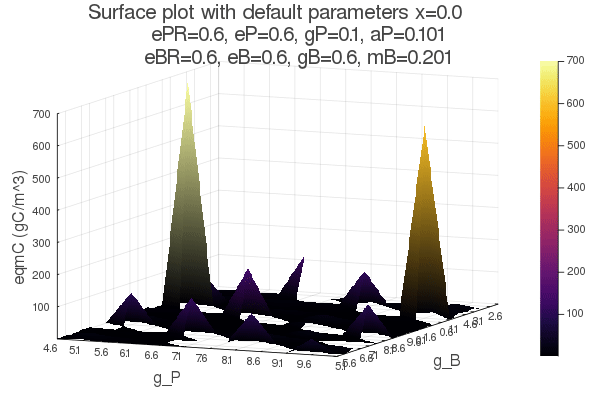

In [6]:
setPara = [1 2 2 1 2 2 2 2 3] # 9 default parameter
colChg = 1 # col for animation
xyAxis =[4 8 10] # xyz axis col
aa = @animate for i in 1:length(unique(rAw[:,colChg]))
    setPara[colChg] = i
    @rput setPara xyAxis
    R"
    ## extract necessary data
    pp = rAw
    for(i in 1:9){
        if(i%in%xyAxis==F){
        pp = pp[which(rAw[,i]==u0[[i]][setPara[i]]),]
    }};rm(i)
    
    ## convert data into matrix
    mm = matrix(NA, nr=length(unique(pp[,xyAxis[1]])), nc=length(unique(pp[,xyAxis[2]])))
    rownames(mm)=unique(pp[,xyAxis[1]])
    colnames(mm)=unique(pp[,xyAxis[2]])
    for(i0 in 1:nrow(pp)){
        mm[which(rownames(mm)==pp[i0,xyAxis[1]]),which(colnames(mm)==pp[i0,xyAxis[2]])] <- pp[i0,xyAxis[3]]
    };rm(i0)
    mmR <- rownames(mm)
    mmC <- colnames(mm)
    "
    @rget mm mmR mmC u0
    if size(mm)[1] >0
    p0 = plot(mmR, mmC, mm, st=:surface,# zlim=[0,10],
    xlabel=string(names(rAw)[xyAxis[1]]),
    ylabel=string(names(rAw)[xyAxis[2]]),
    zlabel=string(names(rAw)[xyAxis[3]])*" (gC/m^3)",
    title="Surface plot with default parameters x="*string(u0[1][setPara[1]])*"
        ePR="*string(u0[2][setPara[2]])*", eP="*string(u0[3][setPara[3]])*", gP="*string(u0[4][setPara[4]])*", aP="*string(u0[5][setPara[5]])*"
        eBR="*string(u0[6][setPara[6]])*", eB="*string(u0[7][setPara[7]])*", gB="*string(u0[8][setPara[8]])*", mB="*string(u0[9][setPara[9]]))
    end
end
gif(aa, "gif/surfacePlt.gif", fps=5)